Previous steps

In [2]:
#choose number of stars
n = 1000000

1) choose the mass of those stars (made for the bad distribution, the used for the rest of the results is the uniform from 'stars')

9.563528500994345e-09
0.9998879817609347


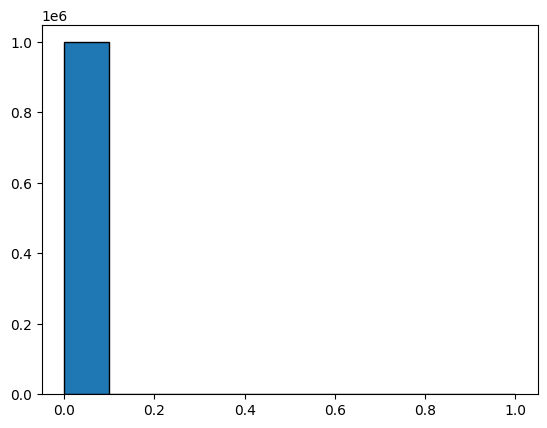

In [25]:
import numpy as np
import matplotlib.pyplot as plt
stars = np.random.uniform(0.08, 200, n)

#Kroupa IMF
def kIMF(m):
    k1 = 0.08
    k23 = k1*0.05
    if 0.01 <= m < 0.08:
        return m**(-0.3)
    if 0.08 <= m < 0.50:
        return k1*(m**(-1.3))
    if 0.50 <= m < 1:
        return k23*(m**(-2.3))
    if 1 <= m :
        return k23*(m**(-2.3))

#calculate KIMF
starmass = []
for i in stars:
    starmass.append(kIMF(i)/kIMF(0.08))

print(min(starmass))
print(max(starmass))
#Plot histogram
plt.hist(starmass, bins=10, edgecolor='black')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

#Scatter plot

#x  = np.log10(stars)
#y = np.log10(starmass)*np.log10(10*stars)

#plt.plot(x,y)
#plt.show()




#print(starmass)

2) choose a time for stars to form

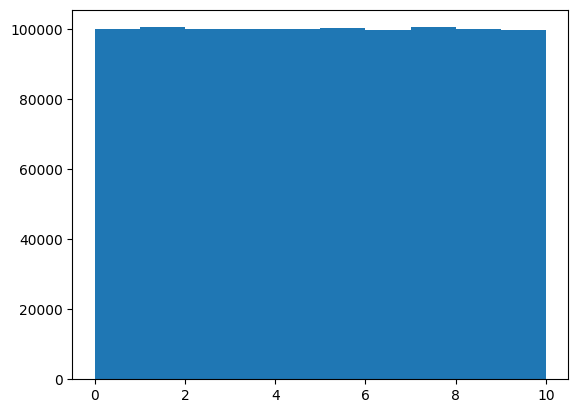

In [47]:
ft = np.random.uniform(0, 10, n)

plt.hist(ft)
plt.show()

3) check the main-sequence lifetime for the drawn mass and 4) What stellar remnant is your star?

In [52]:
l = []
for i in range(0,n):
    l.append([stars[i],ft[i],'class'])

remnants = []
for i in l:
    tms = (10**10)/(i[0]**2.5)
    if i[0] < 9:
        i[2] = 'WD'
    if 8 <= i[0] < 18.5:
        i[2] = 'NS'
    if 18.5 <= i[0]:
        i[2] = 'BH'
    if (10 - i[1]) <= tms:
        remnants.append(i)

In [34]:
print(remnants)

[[2.1334035032232417, 0.7008786241148701, 'WD'], [0.7433150731387103, 4.4011059601316145, 'WD'], [0.4185080505132646, 4.610721252672593, 'WD'], [0.28137278198488347, 1.51890116847609, 'WD'], [0.2076740320482905, 0.28405889416872054, 'WD'], [0.013995977266420776, 4.56865450282037, 'WD'], [0.009707626505108893, 4.850208535415192, 'WD'], [0.007080484169412095, 9.741127764560721, 'WD'], [0.0053649794906067815, 4.127837119959413, 'WD'], [0.004188479394123027, 1.7683722401224855, 'WD'], [0.0033496559991394834, 7.682138318867756, 'WD'], [0.002732404388218855, 2.521425552559676, 'WD'], [0.0022661549500619035, 0.822076368781457, 'WD'], [0.0019061177593603144, 8.656246861547807, 'WD'], [0.0016228145686188568, 7.429248088979248, 'WD'], [0.0013962360893142094, 1.4895154142970202, 'WD'], [0.001212434284844999, 4.447083250814058, 'WD'], [0.0010614584934950174, 7.363317529893319, 'WD'], [0.0009360638867423254, 2.349836303634927, 'WD'], [0.0008308797537447502, 4.1758542098801845, 'WD'], [0.00074186017

final mass calculation:

In [53]:
wdfm = []
nsfm = []
bhfm = []
wda = []
nsa = []
bha = []
for r in remnants:
    if r[2] == 'WD':
        fm = 0.109*r[0]+0.394
        r.append(fm)
        wdfm.append(fm)
        wda.append(10-r[1])
    if r[2] == 'NS':
        if 9 <= r[0] < 13:
            fm = 2.24 + 0.508*(r[0]-14.75) + 0.125*((r[0]-14.75)**2) + 0.011*((r[0]-14.75)**3)
        if 13 <= r[0] < 15:
            fm = 0.123 + 0.112*r[0]
        if 15 <= r[0] < 17.8:
            fm = 0.996 + 0.0384*r[0]
        if 17.8 <= r[0] < 18.5:
            fm = -0.02 + 0.1*r[0]
        r.append(fm)
        nsfm.append(fm)
        nsa.append(10-r[1])
    if r[2] == 'BH':
        if 18.5 <= r[0] <= 45:
          mbha = 15.52 - 0.3294*(r[0] - 25.97) - 0.02121*((r[0]-25.97)**2) + 0.003120*((r[0] - 25.97)**3)
          fm = 0.1*mbha
        if 45 <= r[0] <= 200:
          mbhc = 5.697 + 7.8598*(10**8)*(r[0]**-4.858)
          fm = 0.9*mbhc
        r.append(fm)
        bhfm.append(fm)
        bha.append(10-r[1])

In [26]:
print(nsfm)

[]


Make a normalised histogram which displays the final masses at age of the Milky for
the main sequence stars, white dwarf, neutron stars and black holes (with different
colours).


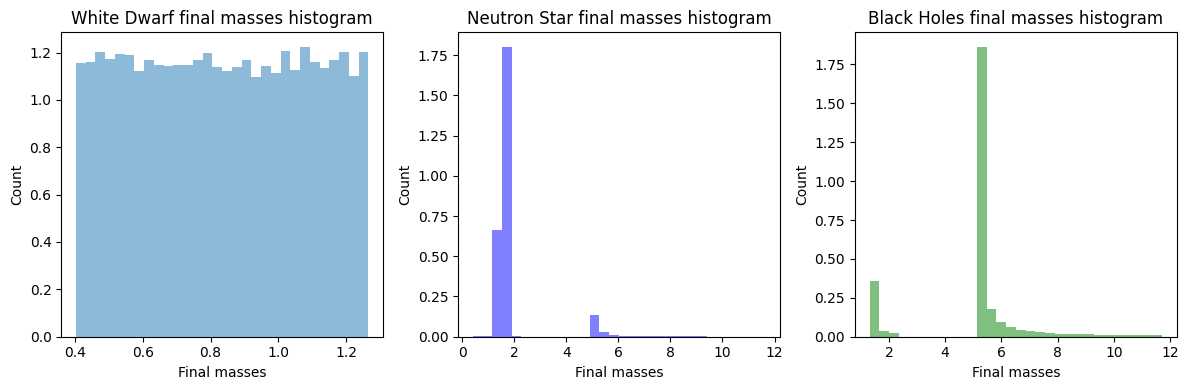

In [54]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
plt.hist(wdfm, bins=30, density=True, alpha=0.5)
plt.xlabel('Final masses')
plt.ylabel('Count')
plt.title('White Dwarf final masses histogram')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
plt.hist(nsfm, bins=30, density=True, alpha=0.5, color='b')
plt.xlabel('Final masses')
plt.ylabel('Count')
plt.title('Neutron Star final masses histogram')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
plt.hist(bhfm, bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Final masses')
plt.ylabel('Count')
plt.title('Black Holes final masses histogram')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Make a histogram of the age of the stellar bodies (with different colours). Discuss the
distribution you are getting, and why does it have that shape

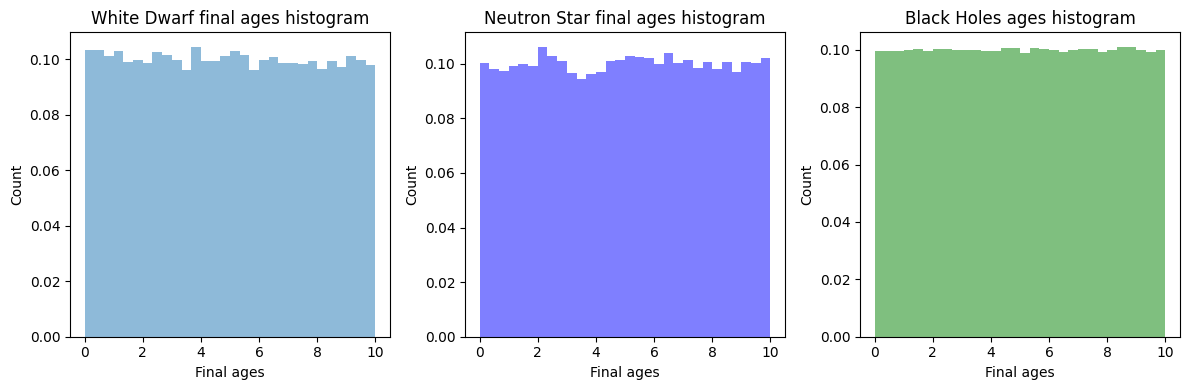

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
plt.hist(wda, bins=30, density=True, alpha=0.5)
plt.xlabel('Final ages')
plt.ylabel('Count')
plt.title('White Dwarf final ages histogram')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
plt.hist(nsa, bins=30, density=True, alpha=0.5, color='b')
plt.xlabel('Final ages')
plt.ylabel('Count')
plt.title('Neutron Star final ages histogram')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
plt.hist(bha, bins=30, density=True, alpha=0.5, color='g')
plt.xlabel('Final ages')
plt.ylabel('Count')
plt.title('Black Holes ages histogram')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Provide the fraction for which each of these 4 stellar bodies, are they consistent with
the census of the Milky way?

In [56]:
twd = len(wda)
tns = len(nsa)
tbh = len(bha)
print('Fraction of white dwarfs:')
print(twd/(twd+tns+tbh))
print('Fraction of neutron stars:')
print(tns/(twd+tns+tbh))
print('Fraction of black holes:')
print(tbh/(twd+tns+tbh))

Fraction of white dwarfs:
0.039748
Fraction of neutron stars:
0.052553
Fraction of black holes:
0.907699


The answer is it doesn't match, the distribution and the range used allow way more black holes to be

Make a flowchart of your code

generate n stars
-> give masses between 0.08 and 200
-> apply the kroupa imf to have the masses at the kroupa distribution (fail)
-> get the formation time
-> assign formation time to each star
->check the main-sequence lifetime
-> see if it is remnant
-> calculate final mass
-> Do the plots